In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [41]:
# Basic libraries for data
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For sentiment analysis
from textblob import TextBlob

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("amazon_review.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [4]:
print(df.info())

# See basic statistics
print(df.describe())

# Check if there are any missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB
None
           overall  unixReviewTime     day_diff  helpful_yes   total_vote
count  4915.000000    4.915000e+03  4915.000000  4915.000000  4915.000000
mean      4.587589    1.379465e+09   437.36704

In [8]:
print(df.columns)

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')


C:\Users\muqsita\AppData\Local\Temp\ipykernel_28140\1943696786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette='viridis')


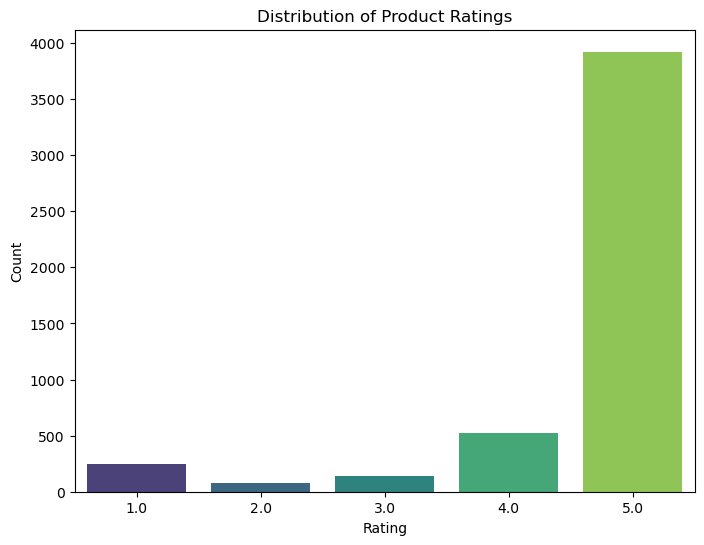

In [10]:
# This sets up the canvas
plt.figure(figsize=(8,6))

# THIS actually draws the chart
sns.countplot(x='overall', data=df, palette='viridis')

# Then you add labels and show
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


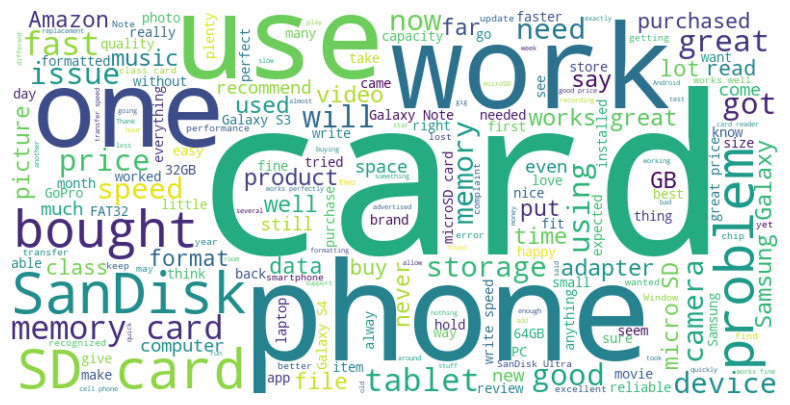

In [12]:
# Combine all reviews into one text
text = " ".join(review for review in df['reviewText'].dropna())

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# 1. How many unique products?
num_products = df['asin'].nunique()
print(f"Total unique products: {num_products}")

# 2. Total number of reviews
num_reviews = df.shape[0]
print(f"Total number of reviews: {num_reviews}")

# 3. How many reviews for each product?
reviews_per_product = df['asin'].value_counts()
print("Reviews per product (Top 10 products):")
print(reviews_per_product.head(10))  # Show only top 10 products

# BONUS: Save all product review counts to CSV if you want
# reviews_per_product.to_csv('reviews_per_product.csv')


Total unique products: 1
Total number of reviews: 4915
Reviews per product (Top 10 products):
asin
B007WTAJTO    4915
Name: count, dtype: int64


In [14]:
# Check unique values in summary
print(df['summary'].unique()[:20])  # Show first 20 unique summaries


['Four Stars' 'MOAR SPACE!!!' 'nothing to really say....'
 'Great buy at this price!!!  *** UPDATE' 'best deal around'
 'Not a lot to really be said' 'Works well'
 "32 GB for less than two sawbucks...what's not to like?" 'Loads of room'
 'works great' '32GB MicroSD Card.'
 'It works, but not as fast as expected' 'A RENOUND NAME BRAND'
 'Great SDHC card' 'Use it for my GoPro Hero 3+ Black'
 'Awesome price, great brand name' 'great price. fast'
 'Get Fast Load Times' 'Very good little Micro SD card' 'works']


In [44]:
#Sentiment Distribution Plot

In [16]:
from textblob import TextBlob

In [17]:
def detect_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [19]:
def detect_sentiment(text):
    if isinstance(text, str):  # Check if text is a string
        blob = TextBlob(text)
        if blob.sentiment.polarity > 0:
            return 'Positive'
        elif blob.sentiment.polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # if it's not a string, mark it Neutral


In [20]:
df['sentiment'] = df['reviewText'].apply(detect_sentiment)


In [21]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentiment
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,Neutral
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,Positive
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,Positive
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,Neutral
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,Positive


In [25]:
# Convert reviewTime to datetime format without specifying the format explicitly
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Check the first few rows to confirm the change
print(df['reviewTime'].head())


0   2014-07-23
1   2013-10-25
2   2012-12-23
3   2013-11-21
4   2013-07-13
Name: reviewTime, dtype: datetime64[ns]


In [29]:
import calendar

# Create a new column with month names
df['month_name'] = df['reviewTime'].dt.month.apply(lambda x: calendar.month_name[x])

# Now group the reviews by year and month_name
monthly_reviews = df.groupby(['year', 'month_name']).size().sort_index()

# Check the result
print(monthly_reviews)


year  month_name
2012  April          11
      August         30
      December      203
      February       17
      January        11
      July           16
      June           16
      March           7
      May            17
      November       87
      October        45
      September      41
2013  April         191
      August        232
      December      306
      February      225
      January       201
      July          234
      June          231
      March         201
      May           207
      November      223
      October       211
      September     216
2014  April         184
      August         71
      December       66
      February      218
      January       263
      July          113
      June          197
      March         242
      May           185
      November       56
      October        71
      September      70
dtype: int64


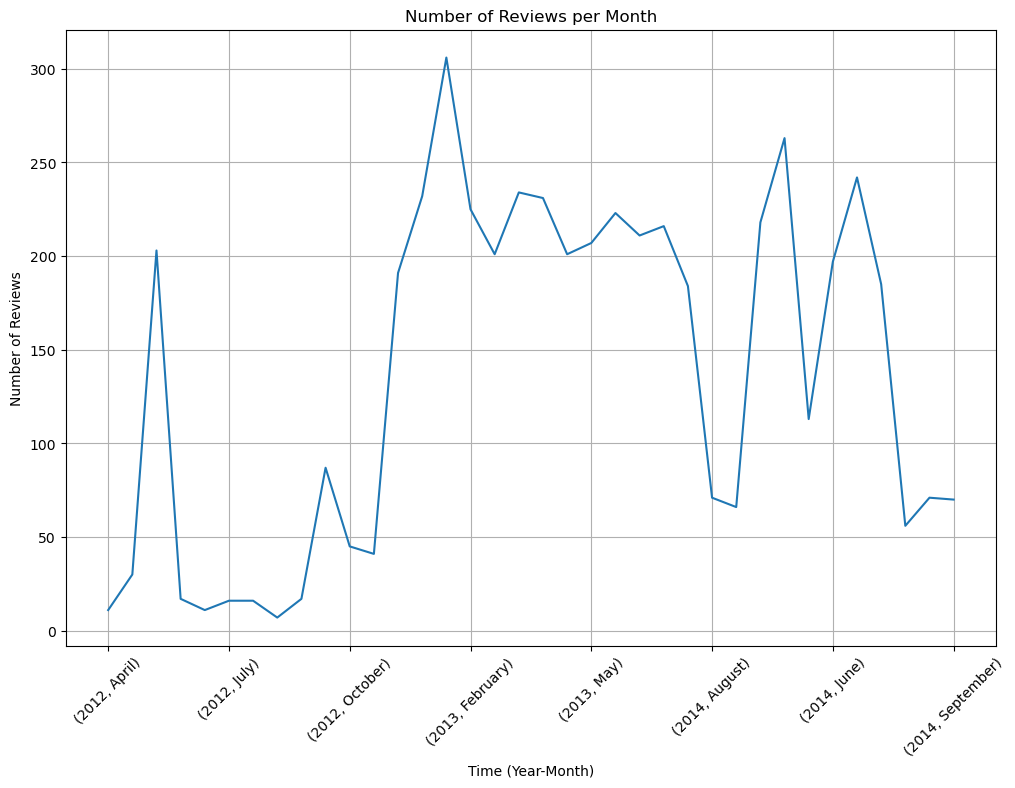

In [37]:
# Plot the trend of reviews over time
monthly_reviews.plot(kind='line', figsize=(12, 8))

plt.title('Number of Reviews per Month')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


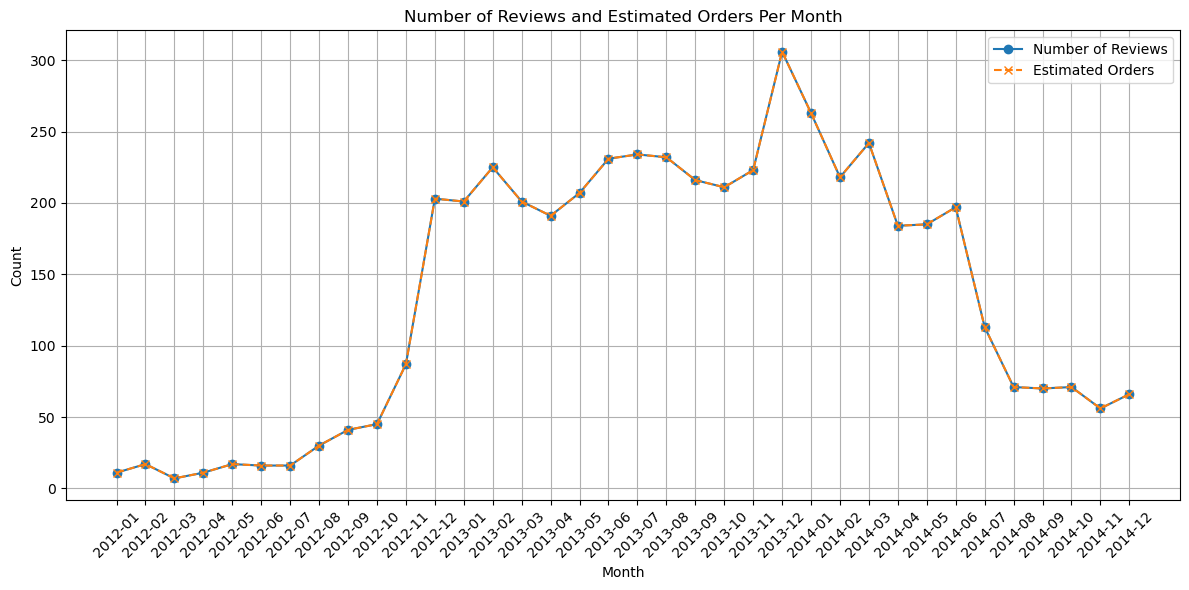

In [40]:
#Step 1: Convert 'reviewTime' to datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Step 2: Create 'Year-Month' column
df['YearMonth'] = df['reviewTime'].dt.to_period('M').astype(str)

# Step 3: Group by 'YearMonth' and count
monthly_counts = df.groupby('YearMonth').size()

# Step 4: Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', label='Number of Reviews')
plt.plot(monthly_counts.index, monthly_counts.values, marker='x', linestyle='--', label='Estimated Orders') # same as reviews
plt.title('Number of Reviews and Estimated Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
#Word Cloud of Positive Reviews

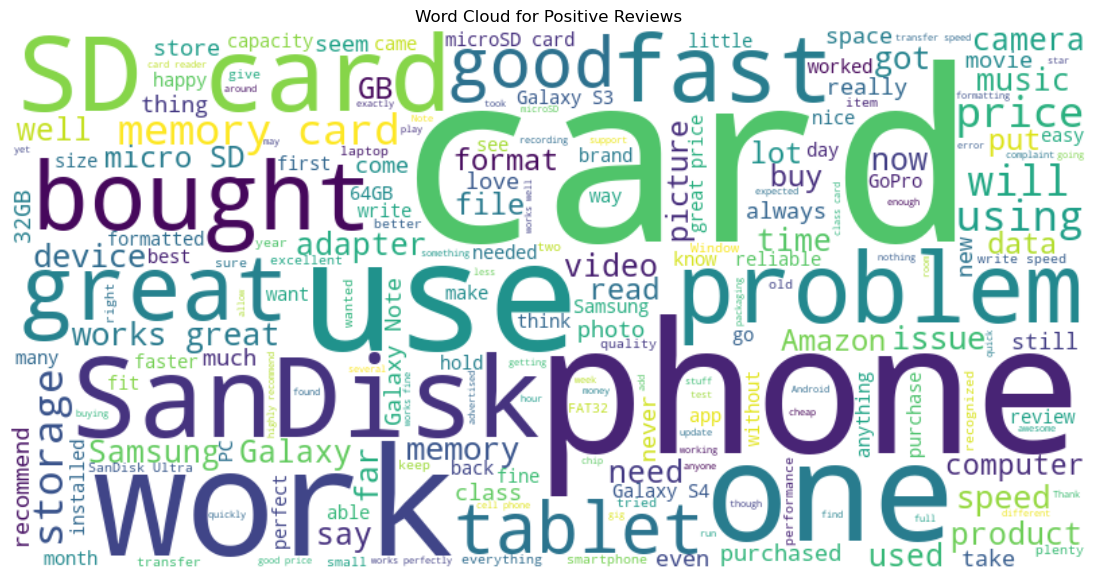

In [52]:
# Create a text of all positive reviews
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['reviewText'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


In [53]:
#Word Cloud of Negative Reviews


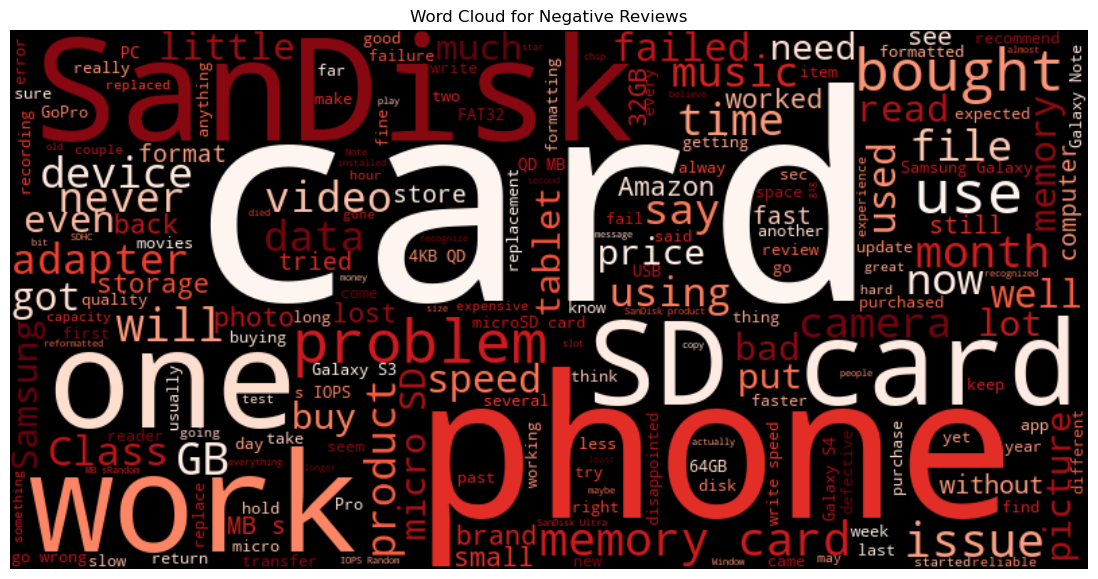

In [54]:
# Create a text of all negative reviews
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['reviewText'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# Plot
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


In [46]:
#Top Reviewers (Who wrote the most reviews?

In [47]:
# Group by reviewerName and count the number of reviews
top_reviewers = df['reviewerName'].value_counts().head(10)

# Display the top reviewers
print(top_reviewers)


reviewerName
Amazon Customer    121
David               10
Michael              9
Chris                8
Mike                 7
John                 7
Brandon              6
Mark                 6
Eric                 6
Jim                  6
Name: count, dtype: int64


In [48]:
#Plot Top Reviewers

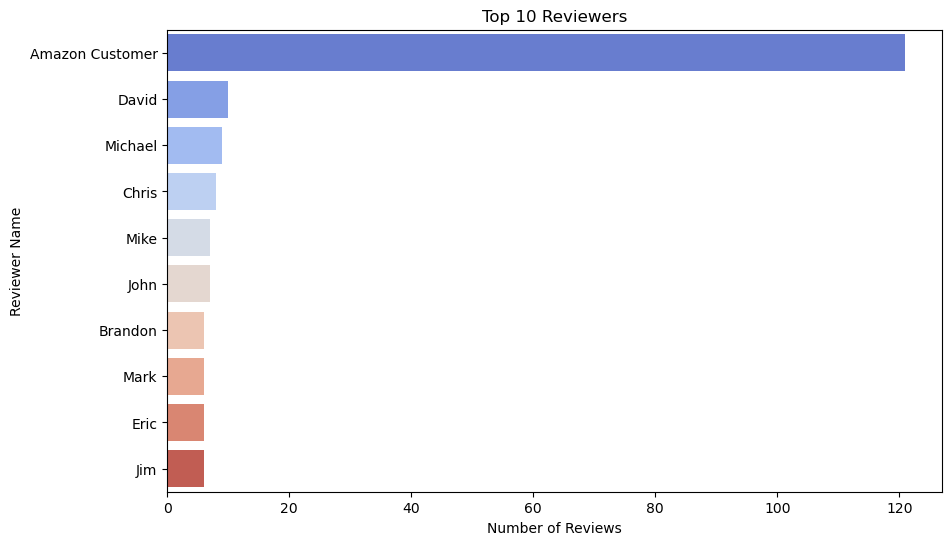

In [49]:
# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='coolwarm')
plt.title('Top 10 Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Name')
plt.show()


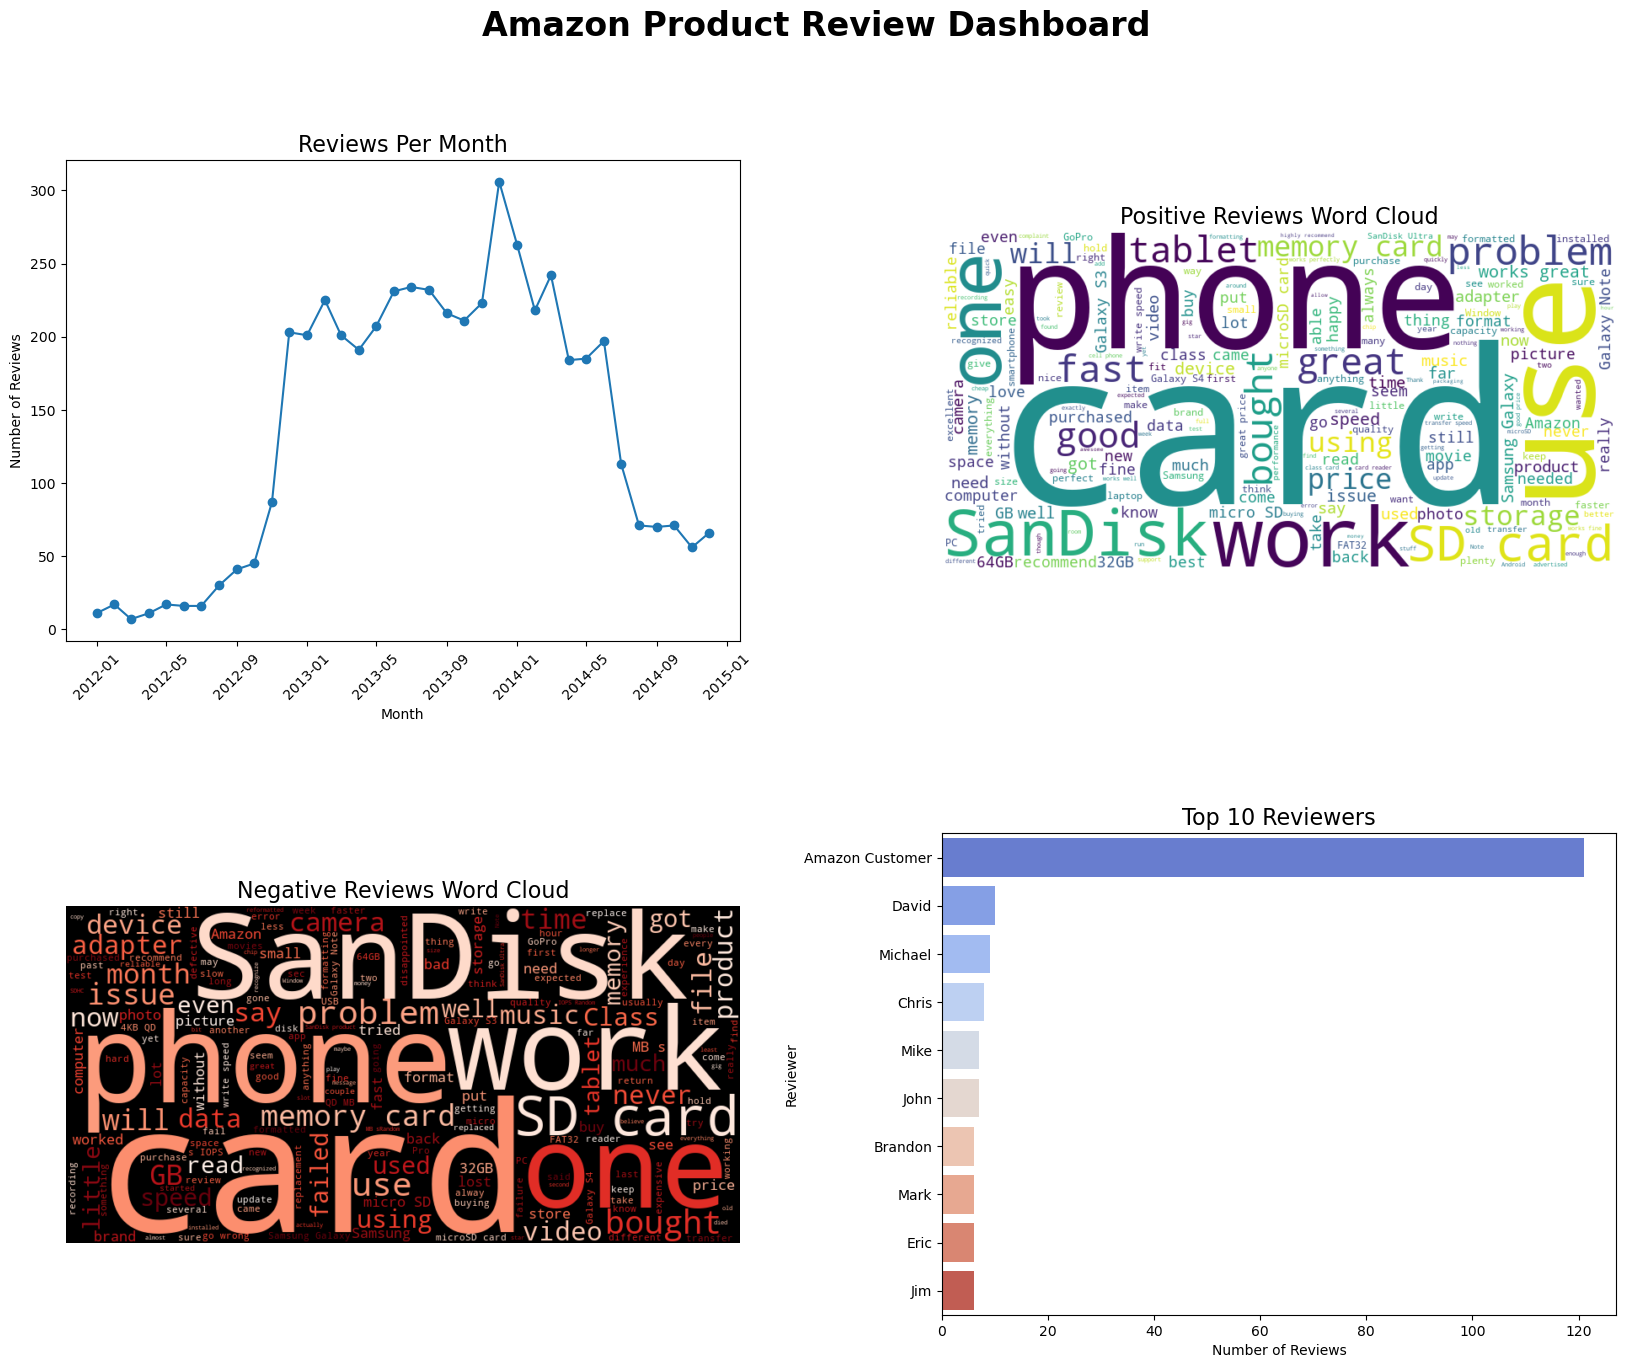

In [67]:

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Adjust the space between plots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Convert reviewTime to datetime if not done already
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Group by month
df['review_month'] = df['reviewTime'].dt.to_period('M')
monthly_reviews = df.groupby('review_month').size()

# Plot
axes[0, 0].plot(monthly_reviews.index.to_timestamp(), monthly_reviews.values, marker='o')
axes[0, 0].set_title('Reviews Per Month', fontsize=16)
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Reviews')
axes[0, 0].tick_params(axis='x', rotation=45)

positive_text = " ".join(df[df['sentiment'] == 'Positive']['reviewText'].dropna())

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

axes[0, 1].imshow(wordcloud_pos, interpolation='bilinear')
axes[0, 1].axis('off')
axes[0, 1].set_title('Positive Reviews Word Cloud', fontsize=16)

negative_text = " ".join(df[df['sentiment'] == 'Negative']['reviewText'].dropna())

wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

axes[1, 0].imshow(wordcloud_neg, interpolation='bilinear')
axes[1, 0].axis('off')
axes[1, 0].set_title('Negative Reviews Word Cloud', fontsize=16)



top_reviewers = df['reviewerName'].value_counts().head(10)

sns.barplot(x=top_reviewers.values, y=top_reviewers.index, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Top 10 Reviewers', fontsize=16)
axes[1, 1].set_xlabel('Number of Reviews')
axes[1, 1].set_ylabel('Reviewer')

fig.suptitle('Amazon Product Review Dashboard', fontsize=24, fontweight='bold')

plt.show()



